Keyword extraction for symtoms from the description

eksperimen 1:
1. removing stopwords (describe)
2. create long string (checklist)
3. combine both string and labels
4. train test split
5. model

eksperimen 2:
1. remove stopwords (describe)
2. create 1 string for each diseases
3. count important words, based on frequency => symptoms
4. combine symptoms from describe and checklist
5. each symptoms has its own number
6. train those numbers

load describe data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path_des = "/content/drive/MyDrive/capstone/ml code (celia iseng)/describe/Symptom2Disease.csv"
df_des = pd.read_csv(path_des)

In [3]:
df_des

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


diseases = label

symptoms = text

In [4]:
des_diseases = df_des['label']
#des_symptoms = df_des.drop(columns = ['label'])

In [5]:
print(des_diseases)
#print(des_symptoms)

0       Psoriasis
1       Psoriasis
2       Psoriasis
3       Psoriasis
4       Psoriasis
          ...    
1195     diabetes
1196     diabetes
1197     diabetes
1198     diabetes
1199     diabetes
Name: label, Length: 1200, dtype: object


In [6]:
!pip install rake-nltk
import nltk
from rake_nltk import Rake
nltk.download('stopwords')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
#remove function
def keywords(text):
  key_arr = []
  r = Rake()
  r.extract_keywords_from_text(text)
  for rating, keyword in r.get_ranked_phrases_with_scores():
    key_arr.append(keyword)
  return key_arr

def sen(arr):
  s = " ".join([str(item) for item in arr])
  return s

In [8]:
sentences_des = []
for i in df_des['text'].values.tolist():
  sentences_des.append(sen(keywords(i)))

In [9]:
sentences_des

['skin rash scaly patches weeks torso red past legs itchy experiencing dry covered arms',
 'stinging sensation often accompanied skin scalp peeling peeling knees especially elbows burning',
 'experiencing joint pain often achy gets worse pain wrists throbbing move knees joints fingers',
 'silver like dusting small scales lower back dusting skin scratch scalp made flake especially easily',
 'often feel inflammatory small dents minor rashes touch tender pits nails even arms',
 'bleed easily deep cracks cracks thickened soles skin palms painful',
 'skin around often itchy noticeable inflammation uncomfortable red nose nails mouth inflamed eyes',
 'reacts easily use temperature skin skin sensitive products often humidity changes careful',
 'face severe joint pain sudden peeling mainly arms different parts skin rashes skin noticed legs body back also',
 'often itchy different parts uncomfortable skin red rashes inflamed genitals burning body',
 'often feel tired good night general feeling e

Checklist

In [10]:
path_check = "/content/drive/MyDrive/capstone/ml code (celia iseng)/checklist/dataset.csv"
df_check = pd.read_csv(path_check)

In [11]:
df_check

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
symptoms_check = df_check.drop(columns=['Disease'])
symptoms_check

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import numpy as np

In [14]:
symptoms_check = symptoms_check.to_numpy()

In [15]:
sentences_check = []
for i in symptoms_check:
  #print(i)
  s = " ".join([str(item).replace("_", " ") for item in i if str(item) != "nan"])
  sentences_check = np.append(sentences_check,s)
print(sentences_check)

['itching  skin rash  nodal skin eruptions  dischromic  patches'
 ' skin rash  nodal skin eruptions  dischromic  patches'
 'itching  nodal skin eruptions  dischromic  patches' ...
 ' burning micturition  bladder discomfort  foul smell of urine  continuous feel of urine'
 ' skin rash  joint pain  skin peeling  silver like dusting  small dents in nails  inflammatory nails'
 ' skin rash  high fever  blister  red sore around nose  yellow crust ooze']


In [16]:
print(type(sentences_check))
print(type(sentences_des))

<class 'numpy.ndarray'>
<class 'list'>


In [17]:
sentences_check = sentences_check.tolist()

In [18]:
print(type(sentences_check))
print(type(sentences_des))

<class 'list'>
<class 'list'>


In [19]:
check_diseases = df_check['Disease']

In [20]:
print(type(des_diseases))
print(type(check_diseases))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [21]:
des_diseases = des_diseases.values.tolist()
check_diseases = check_diseases.values.tolist()

In [22]:
print(type(des_diseases))
print(type(check_diseases))

<class 'list'>
<class 'list'>


In [23]:
print(des_diseases)
print(check_diseases)

['Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Psoriasis', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varicose Veins', 'Varico

gabungin dataset

In [24]:
sentences = sentences_check + sentences_des
diseases = check_diseases + des_diseases

In [25]:
print(sentences)
print(diseases)

['itching  skin rash  nodal skin eruptions  dischromic  patches', ' skin rash  nodal skin eruptions  dischromic  patches', 'itching  nodal skin eruptions  dischromic  patches', 'itching  skin rash  dischromic  patches', 'itching  skin rash  nodal skin eruptions', ' skin rash  nodal skin eruptions  dischromic  patches', 'itching  nodal skin eruptions  dischromic  patches', 'itching  skin rash  dischromic  patches', 'itching  skin rash  nodal skin eruptions', 'itching  skin rash  nodal skin eruptions  dischromic  patches', ' continuous sneezing  shivering  chills  watering from eyes', ' shivering  chills  watering from eyes', ' continuous sneezing  chills  watering from eyes', ' continuous sneezing  shivering  watering from eyes', ' continuous sneezing  shivering  chills', ' shivering  chills  watering from eyes', ' continuous sneezing  chills  watering from eyes', ' continuous sneezing  shivering  watering from eyes', ' continuous sneezing  shivering  chills', ' continuous sneezing  shi

In [26]:
df = {'Diseases': diseases,'sentences': sentences}
df = pd.DataFrame(df)
print(df) 

              Diseases                                          sentences
0     Fungal infection  itching  skin rash  nodal skin eruptions  disc...
1     Fungal infection   skin rash  nodal skin eruptions  dischromic  ...
2     Fungal infection  itching  nodal skin eruptions  dischromic  pat...
3     Fungal infection            itching  skin rash  dischromic  patches
4     Fungal infection           itching  skin rash  nodal skin eruptions
...                ...                                                ...
6115          diabetes  occasionally get palpitations speeding heart t...
6116          diabetes  cuts take skin rashes skin bruises skin well p...
6117          diabetes  frequently feel drowsy also significantly lost...
6118          diabetes  urinary tract infections yeast infections trou...
6119          diabetes  usually gets better dry cough constantly sneez...

[6120 rows x 2 columns]


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
def label_encode(labels):
    label_encoder.fit(labels)
    label_sequences = label_encoder.transform(labels)
    return label_sequences

df['label_encoded'] = label_encode(df['Diseases'])

In [28]:
df

,Diseases,sentences,label_encoded
0,Fungal infection,itching skin rash nodal skin eruptions disc...,16
1,Fungal infection,skin rash nodal skin eruptions dischromic ...,16
2,Fungal infection,itching nodal skin eruptions dischromic pat...,16
3,Fungal infection,itching skin rash dischromic patches,16
4,Fungal infection,itching skin rash nodal skin eruptions,16
...,...,...,...
6115,diabetes,occasionally get palpitations speeding heart t...,44
6116,diabetes,cuts take skin rashes skin bruises skin well p...,44
6117,diabetes,frequently feel drowsy also significantly lost...,44
6118,diabetes,urinary tract infections yeast infections trou...,44


In [29]:
len(df.Diseases.unique())

50

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df['sentences'].values.tolist(),df['label_encoded'].values.tolist(), test_size = 0.2, random_state=1)

In [31]:
print(x_train)
print(x_val)
print(y_train)
print(y_val)

[' vomiting  headache  weakness of one body side  altered sensorium', ' vomiting  headache  nausea  spinning movements  loss of balance  unsteadiness', ' skin rash  high fever  blister  red sore around nose  yellow crust ooze', ' fatigue  mood swings  restlessness  sweating  diarrhoea  fast heart rate  excessive hunger  muscle weakness  irritability  abnormal menstruation', 'trouble standing still experiencing neck pain experiencing back pain muscle weakness feeling lightheaded dry cough', ' constipation  pain during bowel movements  pain in anal region  bloody stool  irritation in anus', ' fatigue  mood swings  weight loss  restlessness  sweating  diarrhoea  fast heart rate  muscle weakness  irritability  abnormal menstruation', ' fatigue  cramps  bruising  obesity  swollen legs  prominent veins on calf', ' vomiting  headache  nausea  spinning movements  loss of balance  unsteadiness', ' skin rash  joint pain  skin peeling  silver like dusting  small dents in nails  inflammatory nails

In [32]:
vocab_size = 2000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [34]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(x_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(x_val)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(type(train_padded))
print(type(validation_padded))
print(validation_padded)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[ 94 449  34 ...   0   0   0]
 [ 40  24  21 ...   0   0   0]
 [  8  18   4 ...   0   0   0]
 ...
 [ 19   8   9 ...   0   0   0]
 [ 20  34  68 ...   0   0   0]
 [  4  16 106 ...   0   0   0]]


In [35]:
def create_model(vocab_size, embedding_dim, max_length):
  model = models.Sequential([
  layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  layers.GlobalAveragePooling1D(),
  layers.Dense(24, activation='relu'),
  layers.Dense(50, activation='softmax')
  ])

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=optimizers.Adam(),
                metrics=['accuracy'])
  
  return model

In [36]:
model = create_model(vocab_size, embedding_dim, max_length)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           32000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 50)                1250      
                                                                 
Total params: 33,658
Trainable params: 33,658
Non-trainable params: 0
_________________________________________________________________


In [37]:
train_labels = np.array(y_train)
validation_labels = np.array(y_val)

In [38]:
train_labels = train_labels.reshape(len(train_labels), 1)
validation_labels = validation_labels.reshape(len(validation_labels), 1)

In [39]:
num_epochs = 35
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_labels))

Epoch 1/35
153/153 [==============================] - 3s 10ms/step - loss: 3.8933 - accuracy: 0.0241 - val_loss: 3.8698 - val_accuracy: 0.0286
Epoch 2/35
153/153 [==============================] - 1s 8ms/step - loss: 3.8371 - accuracy: 0.0562 - val_loss: 3.8217 - val_accuracy: 0.0645
Epoch 3/35
153/153 [==============================] - 1s 8ms/step - loss: 3.7589 - accuracy: 0.0899 - val_loss: 3.7090 - val_accuracy: 0.0703
Epoch 4/35
153/153 [==============================] - 1s 10ms/step - loss: 3.5712 - accuracy: 0.1113 - val_loss: 3.4624 - val_accuracy: 0.1520
Epoch 5/35
153/153 [==============================] - 2s 10ms/step - loss: 3.2888 - accuracy: 0.1467 - val_loss: 3.1698 - val_accuracy: 0.1560
Epoch 6/35
153/153 [==============================] - 1s 9ms/step - loss: 3.0078 - accuracy: 0.2122 - val_loss: 2.8930 - val_accuracy: 0.2508
Epoch 7/35
153/153 [==============================] - 2s 10ms/step - loss: 2.7407 - accuracy: 0.3125 - val_loss: 2.6285 - val_accuracy: 0.3529
Ep

In [40]:
from sklearn.metrics import classification_report
pred = model.predict(validation_padded, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(validation_labels, predicted)
print(report)

39/39 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        22
           1       0.85      1.00      0.92        22
           2       0.86      1.00      0.93        32
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        33
           6       0.97      1.00      0.98        32
           7       1.00      1.00      1.00        26
           8       0.84      0.93      0.89        29
           9       0.91      0.91      0.91        22
          10       1.00      0.90      0.95        31
          11       1.00      0.82      0.90        33
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        27
          16       1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


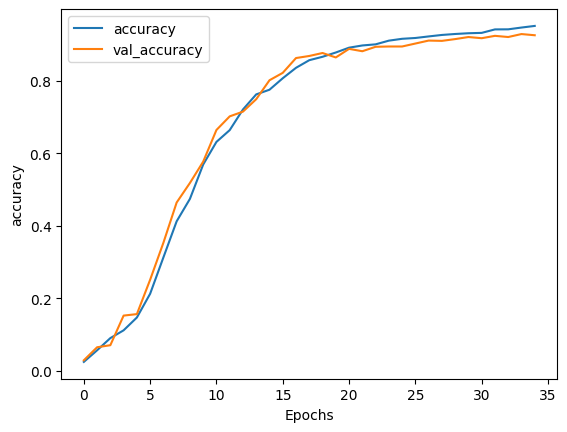

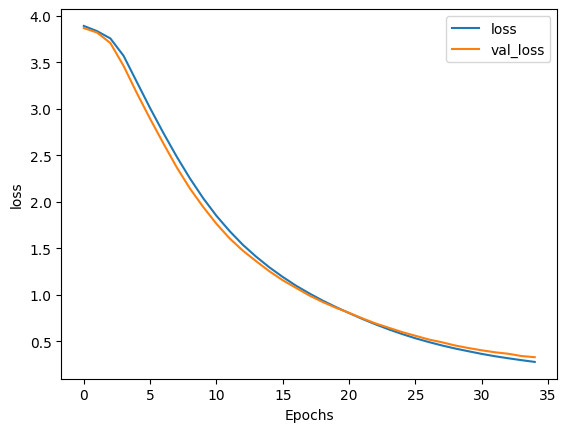

In [41]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [42]:
filepath = "/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 1/model.h5"

In [43]:
model.save(filepath, save_format='h5')

In [46]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [47]:
import tensorflowjs as tfjs

In [48]:
tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 1/")

In [49]:
word_index = tokenizer.word_index

In [50]:
index_to_word = {index: word for word, index in word_index.items()}

In [51]:
dict_input = pd.DataFrame.from_dict(index_to_word, orient='index', columns=['Word'])

In [52]:
csv_filename = '/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 1/dict_input.csv'
dict_input.to_csv(csv_filename)

In [53]:
label_mapping = {label: encoded_label for label, encoded_label in zip(df['Diseases'].tolist(),df['label_encoded'].tolist())}

In [54]:
dict_output = pd.DataFrame.from_dict(label_mapping, orient='index', columns=['EncodedLabel'])
dict_output.index.name = 'OriginalLabel'

In [55]:
csv_filename = '/content/drive/MyDrive/capstone/ml code (celia iseng)/Eksperimen~~/model experimen 1/dict_output.csv'
dict_output.to_csv(csv_filename)